In [3]:
# importing necessary libraries
import numpy as np
import pandas as pd
import os

import mne
from scipy import signal

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

### **Loading and Exploring EEG Data**

In [8]:
data_path = 'data' 

eeg_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]
print(f"Total EEG files found: {len(eeg_files)}")

eeg_data = {}

for file in eeg_files:
    file_path = os.path.join(data_path, file)
    eeg_df = pd.read_csv(file_path)
    eeg_data[file] = eeg_df

    if file == eeg_files[0]:  
        print(f"\nPreview of {file}:")
        display(eeg_df.head())

Total EEG files found: 54

Preview of S7S1.csv:


,EEG.AF3,EEG.T7,EEG.Pz,EEG.T8,EEG.AF4
0,-88.92793,-22.62484,0.95961,-15.26953,-73.06178
1,-87.38936,-10.31723,7.62612,-18.85937,-78.70240
2,-99.69698,-12.36850,-1.09166,-21.42334,-88.95924
3,-107.90205,-20.57357,-13.91197,-25.01318,-91.52320
4,-102.77412,-26.72787,-26.73277,-34.24414,-90.49733


In [ ]:
first_file = eeg_files[0]
df = eeg_data[first_file]

# Extract metadata
num_channels = df.shape[1]
sampling_rate = 1 / (df.iloc[1, 0] - df.iloc[0, 0])  # Calculate from time difference
duration = df.iloc[-1, 0] - df.iloc[0, 0]  # Duration in seconds

print(f"\nMetadata for {first_file}:")
print(f" - Number of Channels: {num_channels}")
print(f" - Sampling Rate: {sampling_rate:.2f} Hz")
print(f" - Duration: {duration:.2f} seconds")



Metadata for S7S1.csv:
 - Number of Channels: 5
 - Sampling Rate: 0.65 Hz
 - Duration: 255.90 seconds


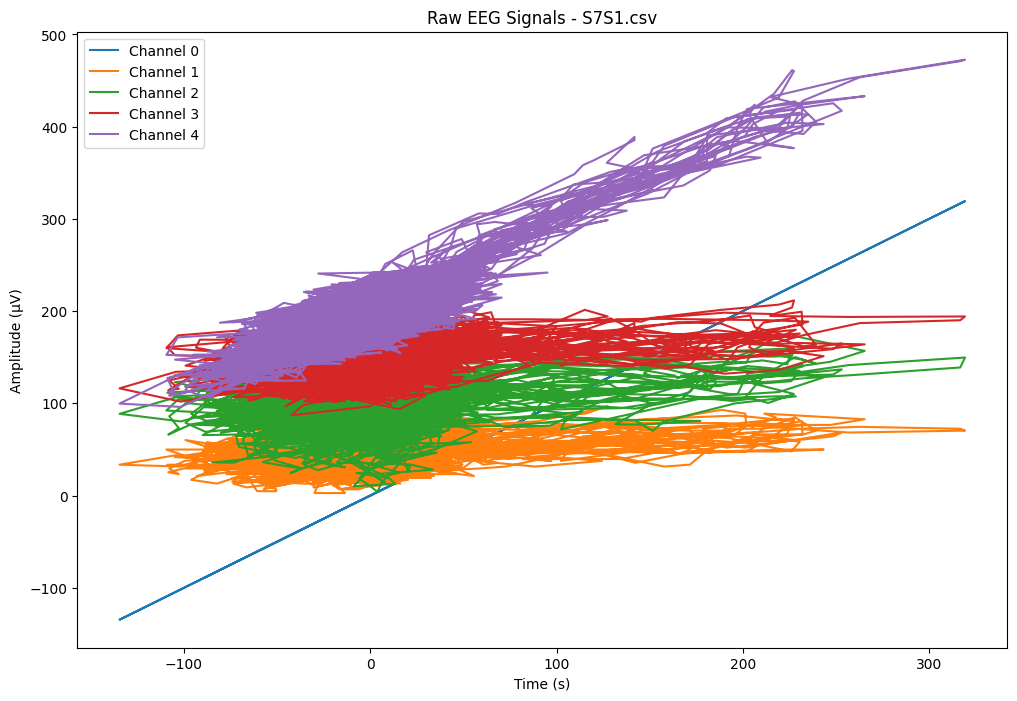

In [14]:
time = df.iloc[:, 0]  # Time column

plt.figure(figsize=(12, 8))
for i in range(0, 5):
    plt.plot(time, df.iloc[:, i] + (i * 50), label=f'Channel {i}')  # Offset for clarity

plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.title(f"Raw EEG Signals - {first_file}")
plt.legend()
plt.show()

### **Preprocessing the EEG Data**

### **Feature Extraction**
- Extract frequency-domain features using FFT, Power Spectral Density (PSD), or DWT

### **Data Visualization**